In [1]:
# lets start by uploading the different librairies

#

In [1]:
import pandas as pd
import numpy as np
from numpy.lib.tests.test__datasource import malicious_files
from sklearn.model_selection import train_test_split


In [5]:

data = pd.read_csv('/mnt/LockShieldStorage/project/ls23pr_v1.csv', low_memory=False)

In [29]:
data.columns.to_list()
# data.columns = data.columns.str.strip()

['Flow ID',
 'SrcIP',
 'DstIP',
 'SrcPort',
 'DstPort',
 'Protocol',
 'mTimestampStart',
 'mTimestampLast',
 'Flow Duration',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'Total Length of Fwd Packet',
 'Total Length of Bwd Packet',
 'Fwd Packet Length Min',
 'Fwd Packet Length Max',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Min',
 'Bwd Packet Length Max',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Max',
 'Flow IAT Stddev',
 'Fwd IAT Min',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Tot',
 'Bwd IAT Min',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Tot',
 'Fwd PSH flags',
 'Bwd PSH flags',
 'Fwd URG flags',
 'Bwd URG flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Cnt',
 'SYN Flag Cn

In [30]:
suricata  =  ['SigID revision', 'Category','Severity', 'Anomaly_event' ]
print(suricata)

['SigID revision', 'Category', 'Severity', 'Anomaly_event']


In [31]:
suricata_data = data[suricata]

In [ ]:
data_flow = data.drop(columns=['SigID revision', 'Category','Severity', 'Anomaly_event' ])


In [12]:
columns_specials = ['Label_src', 'Label_dst']
DataFlow = data_flow.drop(columns=columns_specials)

In [13]:
print(DataFlow["Label"].value_counts())

Label
0    14708912
1     1644599
Name: count, dtype: int64


In [14]:
# I would like now to check the distribution of the data for the Label = 00
# let's separate the 2 datas

begnin = DataFlow[DataFlow["Label"] == 0]
malictious = DataFlow[DataFlow["Label"] == 1]

print("Begnin data size : ", begnin.shape)
print("malicous Data size :", malictious.shape)

# lets keep enough datas for the two types of datas
malicious_size = malictious.shape[0]
begnin_data  = begnin.sample(n=malicious_size, random_state=142)

print("Begnin data size : ", begnin_data.shape)
print("malicous Data size :", malictious.shape)





Begnin data size :  (14708912, 95)
malicous Data size : (1644599, 95)
Begnin data size :  (1644599, 95)
malicous Data size : (1644599, 95)


In [15]:
# lets make the two datasets together and shuffle

balanced_data = pd.concat([begnin_data, malictious])
print("size of balanced data : ", balanced_data.shape)

balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)



size of balanced data :  (3289198, 95)


In [16]:
balanced_data.to_csv("balanced_data.csv", index=False)

In [2]:
# lets load the datas
balanced_data = pd.read_csv("balanced_data.csv", low_memory=False)

In [80]:
balanced_data.head()

,Flow ID,SrcIP,DstIP,SrcPort,DstPort,Protocol,mTimestampStart,mTimestampLast,Flow Duration,Flow Bytes/s,...,Int/Ext Dst IP,Conn_state,Service,Label,External_src,External_dst,Segment_src,Segment_dst,Expoid_src,Expoid_dst
0,10.5.8.2-100.101.1.193-64286-80-6,10.5.8.2,100.101.1.193,64286,80,6,1678369949284619,1678369949295858,11239,2.467301e+05,...,1,SF,NaN,1,0,1,baf_int,NaN,dc1.int.baf.05.berylia.org,NaN
1,10.5.8.4-100.101.1.193-53267-80-6,10.5.8.4,100.101.1.193,53267,80,6,1678367661716757,1678367661723688,6931,3.432405e+05,...,1,SF,Http,1,0,1,baf_int,NaN,files.int.baf.05.berylia.org,NaN
2,2a07:1182:0005:1001:0000:0000:0000:0037-2a00:1...,2a07:1182:0005:1001:0000:0000:0000:0037,2a00:16e0:0100:0000:c16d:8ed9:e86a:1111,61382,443,6,1678366467408717,1678366467424855,16138,3.139794e+05,...,1,OTH,TLS,1,0,1,baf_int,NaN,ws2-baf02.int.baf.05.berylia.org,NaN
3,10.5.12.12-57.70.176.80-51085-80-6,10.5.12.12,57.70.176.80,51085,80,6,1678358112170128,1678358112190397,20269,1.502294e+05,...,1,SF,NaN,1,0,1,baf_bg,NaN,ws1-bg02.int.baf.05.berylia.org,NaN
4,100.96.5.31-100.96.5.32-48249-8472-17,100.96.5.31,100.96.5.32,48249,8472,17,1678277529708947,1678277529708956,9,2.066667e+07,...,0,NaN,NaN,0,0,0,beg_dmz,beg_dmz,k8s-worker01.beg.05.berylia.org,k8s-worker02.beg.05.berylia.org


In [4]:
# let's separate the two types of datas X and y
data = balanced_data.drop(columns=['Flow ID', 'SrcIP', 'DstIP'] )
#y = balanced_data['Label']

print(data.shape)


(3289198, 92)


In [6]:
# let's see where are the caterigolical datas

# Check the data types in your features
categorical_columns = data.select_dtypes(include=["object", "category"]).columns
print("Categorical columns:", categorical_columns.tolist())

Categorical columns: ['Conn_state', 'Service', 'Segment_src', 'Segment_dst', 'Expoid_src', 'Expoid_dst']


In [9]:

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Check for infinite values
print("Infinite values per column:")
print(np.isinf(data).sum())


Missing values per column:
SrcPort                  0
DstPort                  0
Protocol                 0
mTimestampStart          0
mTimestampLast           0
                    ...   
External_dst             0
Segment_src         453715
Segment_dst        2066773
Expoid_src          453715
Expoid_dst         2066773
Length: 92, dtype: int64
Infinite values per column:


TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [13]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# replace by means


# Fill missing values with column means
data_cleaned = data.fillna(data.mean())
print(data_cleaned.shape)




TypeError: can only concatenate str (not "int") to str

SrcPort            0
DstPort            0
Protocol           0
mTimestampStart    0
mTimestampLast     0
                  ..
External_dst       0
Segment_src        0
Segment_dst        0
Expoid_src         0
Expoid_dst         0
Length: 91, dtype: int64


Columns with missing data:
 Flow Bytes/s          152
Flow IAT Mean      340184
Flow IAT Min       340184
Flow IAT Max       340184
Flow IAT Stddev    340184
dtype: int64


Contains NaN: SrcPort            False
DstPort            False
Protocol           False
mTimestampStart    False
mTimestampLast     False
                   ...  
External_dst       False
Segment_src        False
Segment_dst        False
Expoid_src         False
Expoid_dst         False
Length: 91, dtype: bool
Contains Infinity: SrcPort            False
DstPort            False
Protocol           False
mTimestampStart    False
mTimestampLast     False
                   ...  
External_dst       False
Segment_src        False
Segment_dst        False
Expoid_src         False
Expoid_dst         False
Length: 91, dtype: bool
Max Value: 1678376515702898.0
Min Value: -130.0


Contains NaN: SrcPort            False
DstPort            False
Protocol           False
mTimestampStart    False
mTimestampLast     False
                   ...  
External_dst       False
Segment_src        False
Segment_dst        False
Expoid_src         False
Expoid_dst         False
Length: 91, dtype: bool
Contains Infinity: SrcPort            False
DstPort            False
Protocol           False
mTimestampStart    False
mTimestampLast     False
                   ...  
External_dst       False
Segment_src        False
Segment_dst        False
Expoid_src         False
Expoid_dst         False
Length: 91, dtype: bool
Max Value: 1678376515702898.0
Min Value: -130.0


Training: 80.00%
Validation: 10.00%
Test: 10.00%


[0]	train-logloss:0.59874	validation-logloss:0.59872
[1]	train-logloss:0.52147	validation-logloss:0.52147
[2]	train-logloss:0.45692	validation-logloss:0.45691
[3]	train-logloss:0.40229	validation-logloss:0.40228
[4]	train-logloss:0.35562	validation-logloss:0.35562
[5]	train-logloss:0.31545	validation-logloss:0.31545
[6]	train-logloss:0.28047	validation-logloss:0.28049
[7]	train-logloss:0.24996	validation-logloss:0.25000
[8]	train-logloss:0.22317	validation-logloss:0.22322
[9]	train-logloss:0.19957	validation-logloss:0.19963
[10]	train-logloss:0.17870	validation-logloss:0.17876
[11]	train-logloss:0.16023	validation-logloss:0.16030
[12]	train-logloss:0.14387	validation-logloss:0.14395
[13]	train-logloss:0.12932	validation-logloss:0.12941
[14]	train-logloss:0.11626	validation-logloss:0.11636
[15]	train-logloss:0.10463	validation-logloss:0.10474
[16]	train-logloss:0.09423	validation-logloss:0.09434
[17]	train-logloss:0.08498	validation-logloss:0.08509
[18]	train-logloss:0.07662	validation-

Test Accuracy: 1.00


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    164875
           1       1.00      1.00      1.00    164045

    accuracy                           1.00    328920
   macro avg       1.00      1.00      1.00    328920
weighted avg       1.00      1.00      1.00    328920



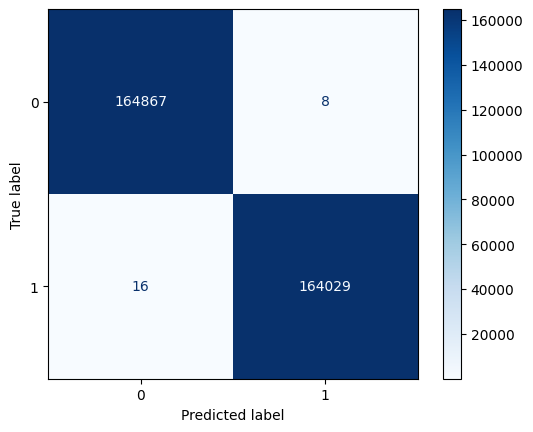

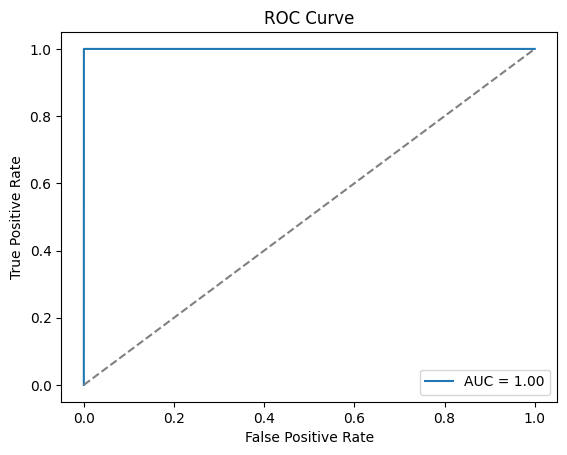

In [121]:
# debuging
X.head()

,SrcPort,DstPort,Protocol,mTimestampStart,mTimestampLast,Flow Duration,Flow Bytes/s,Flow Packets/s,Tot Fwd Pkts,Tot Bwd Pkts,...,L3/L4 Protocol,Int/Ext Dst IP,Conn_state,Service,External_src,External_dst,Segment_src,Segment_dst,Expoid_src,Expoid_dst
0,64286,80,6,1678369949284619,1678369949295858,11239,2.467301e+05,1512.590088,12,5,...,0,1,8,25,0,1,6,20,32,152
1,53267,80,6,1678367661716757,1678367661723688,6931,3.432405e+05,3029.865820,16,5,...,0,1,8,3,0,1,6,20,38,152
2,61382,443,6,1678366467408717,1678366467424855,16138,3.139794e+05,2292.725245,29,8,...,0,1,0,20,0,1,6,20,130,152
3,51085,80,6,1678358112170128,1678358112190397,20269,1.502294e+05,937.392077,14,5,...,0,1,8,25,0,1,4,20,124,152
4,48249,8472,17,1678277529708947,1678277529708956,9,2.066667e+07,333333.333333,3,0,...,1,0,11,25,0,0,10,10,72,69


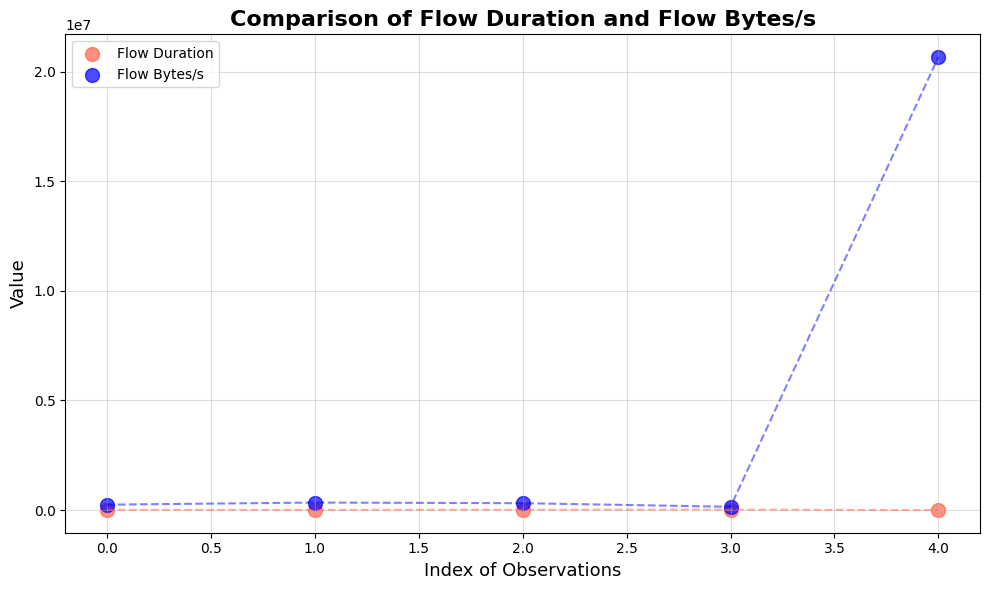

In [122]:
import matplotlib.pyplot as plt

# Visualization 1: Distribution of `Flow Duration` and `Flow Bytes/s`
plt.figure(figsize=(10, 6))
plt.scatter(range(len(X.head())), X.head()['Flow Duration'], label="Flow Duration", s=100, color='tomato', alpha=0.7)
plt.scatter(range(len(X.head())), X.head()['Flow Bytes/s'], label="Flow Bytes/s", s=100, color='blue', alpha=0.7)
plt.plot(range(len(X.head())), X.head()['Flow Duration'], color='tomato', alpha=0.5, linestyle='--')
plt.plot(range(len(X.head())), X.head()['Flow Bytes/s'], color='blue', alpha=0.5, linestyle='--')
plt.title("Comparison of Flow Duration and Flow Bytes/s", fontsize=16, fontweight='bold')
plt.xlabel("Index of Observations", fontsize=13)
plt.ylabel("Value", fontsize=13)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


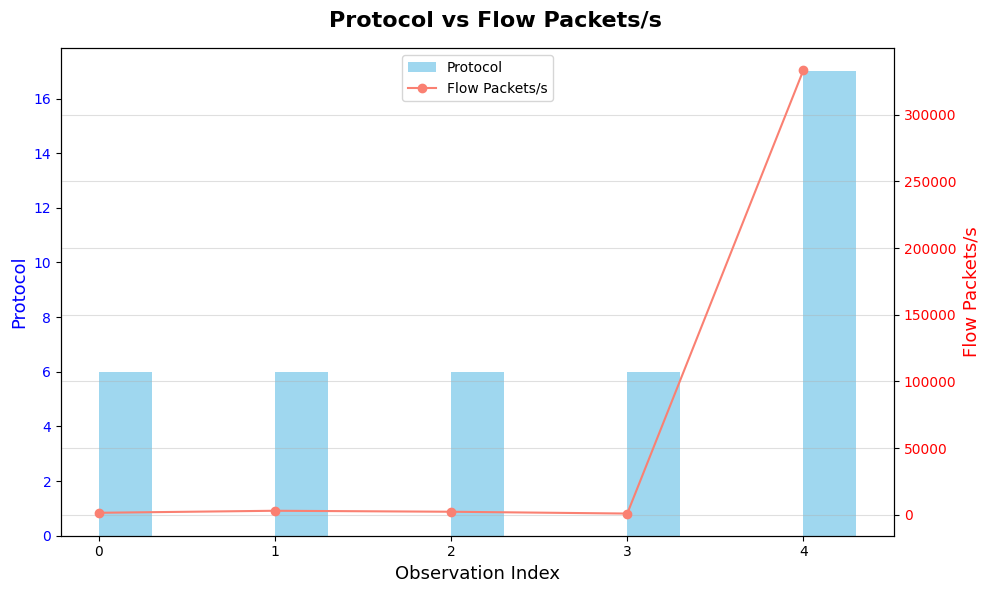

In [123]:
import matplotlib.pyplot as plt

# Visualization 2: Protocol Usage with Flow Packets/s
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.bar(X.head().index, X.head()['Protocol'], color='skyblue', label="Protocol", alpha=0.8, width=0.3, align='edge')
ax2.plot(X.head().index, X.head()['Flow Packets/s'], color='salmon', label="Flow Packets/s", marker='o')

ax1.set_xlabel('Observation Index', fontsize=13)
ax1.set_ylabel('Protocol', color='blue', fontsize=13)
ax2.set_ylabel('Flow Packets/s', color='red', fontsize=13)
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')
fig.suptitle("Protocol vs Flow Packets/s", fontsize=16, fontweight='bold')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


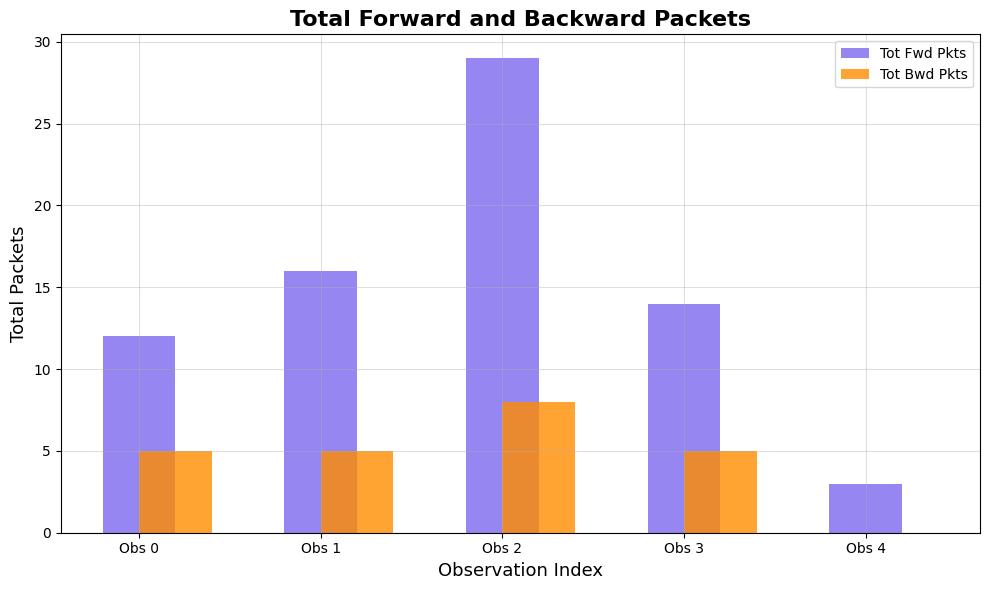

In [124]:
import matplotlib.pyplot as plt

# Visualization 3: Total Forward and Backward Packets
plt.figure(figsize=(10, 6))
indices = range(len(X.head()))
plt.bar(indices, X.head()['Tot Fwd Pkts'], color='mediumslateblue', alpha=0.8, width=0.4, label='Tot Fwd Pkts',
        align='center')
plt.bar(indices, X.head()['Tot Bwd Pkts'], color='darkorange', alpha=0.8, width=0.4, label='Tot Bwd Pkts', align='edge')
plt.title("Total Forward and Backward Packets", fontsize=16, fontweight='bold')
plt.xlabel("Observation Index", fontsize=13)
plt.ylabel("Total Packets", fontsize=13)
plt.xticks(indices, [f'Obs {i}' for i in indices])
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()
